In [1]:
%matplotlib widget

import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

from ProcessResults import *
from DatasetTester import *
from Emotrics_GetLandmarks_new import GetLandmarks 
from LandmarkTester_alt import LandmarkTester

from landmark_utils import vis_landmarks, compare_landmarks

import seaborn as sns

from vis_utils import *

ModuleNotFoundError: No module named 'Emotrics_GetLandmarks_new'

In [ ]:
test = DatasetIntegrator("./NeuroFace_Open_Access_Data/")

Patient A002 loading...
Patient A006 loading...
Patient A008 loading...
Patient A009 loading...
Patient A010 loading...
Patient A011 loading...
Patient A012 loading...
Patient A014 loading...
Patient A015 loading...
Patient A016 loading...
Patient A017 loading...
Patient OP01 loading...
Patient OP02 loading...
Patient OP03 loading...
Patient S001 loading...
Patient S002 loading...
Patient S003 loading...
Patient S005 loading...
Patient S006 loading...
Patient S007 loading...
Patient S008 loading...
Patient S009 loading...
Patient S011 loading...
Patient S012 loading...
Patient S013 loading...
Patient N001 loading...
Patient N002 loading...
Patient N003 loading...
Patient N004 loading...
Patient N007 loading...
Patient N008 loading...
Patient N010 loading...
Patient N011 loading...
Patient N012 loading...
Patient N017 loading...
Patient N019 loading...
DatasetIntegrator initialized.
ALS: 11
Stroke: 14
Control: 11


In [ ]:
#('BBP_NORMAL', 'DDK_PATAKA', 'DDK_PA', 'NSM_BLOW', 'NSM_KISS', 'NSM_OPEN', 'NSM_SPREAD', 'NSM_BIGSMILE', 'NSM_BROW')
generator = test.patients_generator(disease_type="control", tasks=('NSM_BLOW'))

In [ ]:
all_controls = np.array(list(generator))

In [ ]:
all_controls.shape

(11, 1)

In [ ]:
features_list = []
im_list = []
lm_list = []
frame_list = []

for this_dict in all_controls:
    pat_dict = this_dict[0]
    for t in pat_dict.keys():
        task_dict = pat_dict[t]
        for f in task_dict.keys():
            frame_list.append(f)
            lms_gt = task_dict[f]['landmarks_gt']
            bbox = task_dict[f]['bbox']
            pr = ProcessResults(lms_gt, 'lms_only')
            #pr.scale_by_bbox(bbox)
            features_list.append(pr._features)
            
            gem_lm = to_gemma_landmarks(lms_gt)
            tilt_angle = angle(gem_lm, 48, 49)
            rot_center = tuple(np.int16(gem_lm[48]))
            
            rot_lm = rotate_landmarks(gem_lm,
                                           rot_center,
                                           -tilt_angle)
            rot_im = rotate_image(task_dict[f]['image'],
                                            rot_center,
                                            -tilt_angle)
            
            im_list.append(rot_im)
            lm_list.append(rot_lm)
            #vis_image(np.flip(rot_im, axis=-1))
            #vis_landmarks(np.flip(rot_im, axis=-1), rot_lm, title=f)
    break

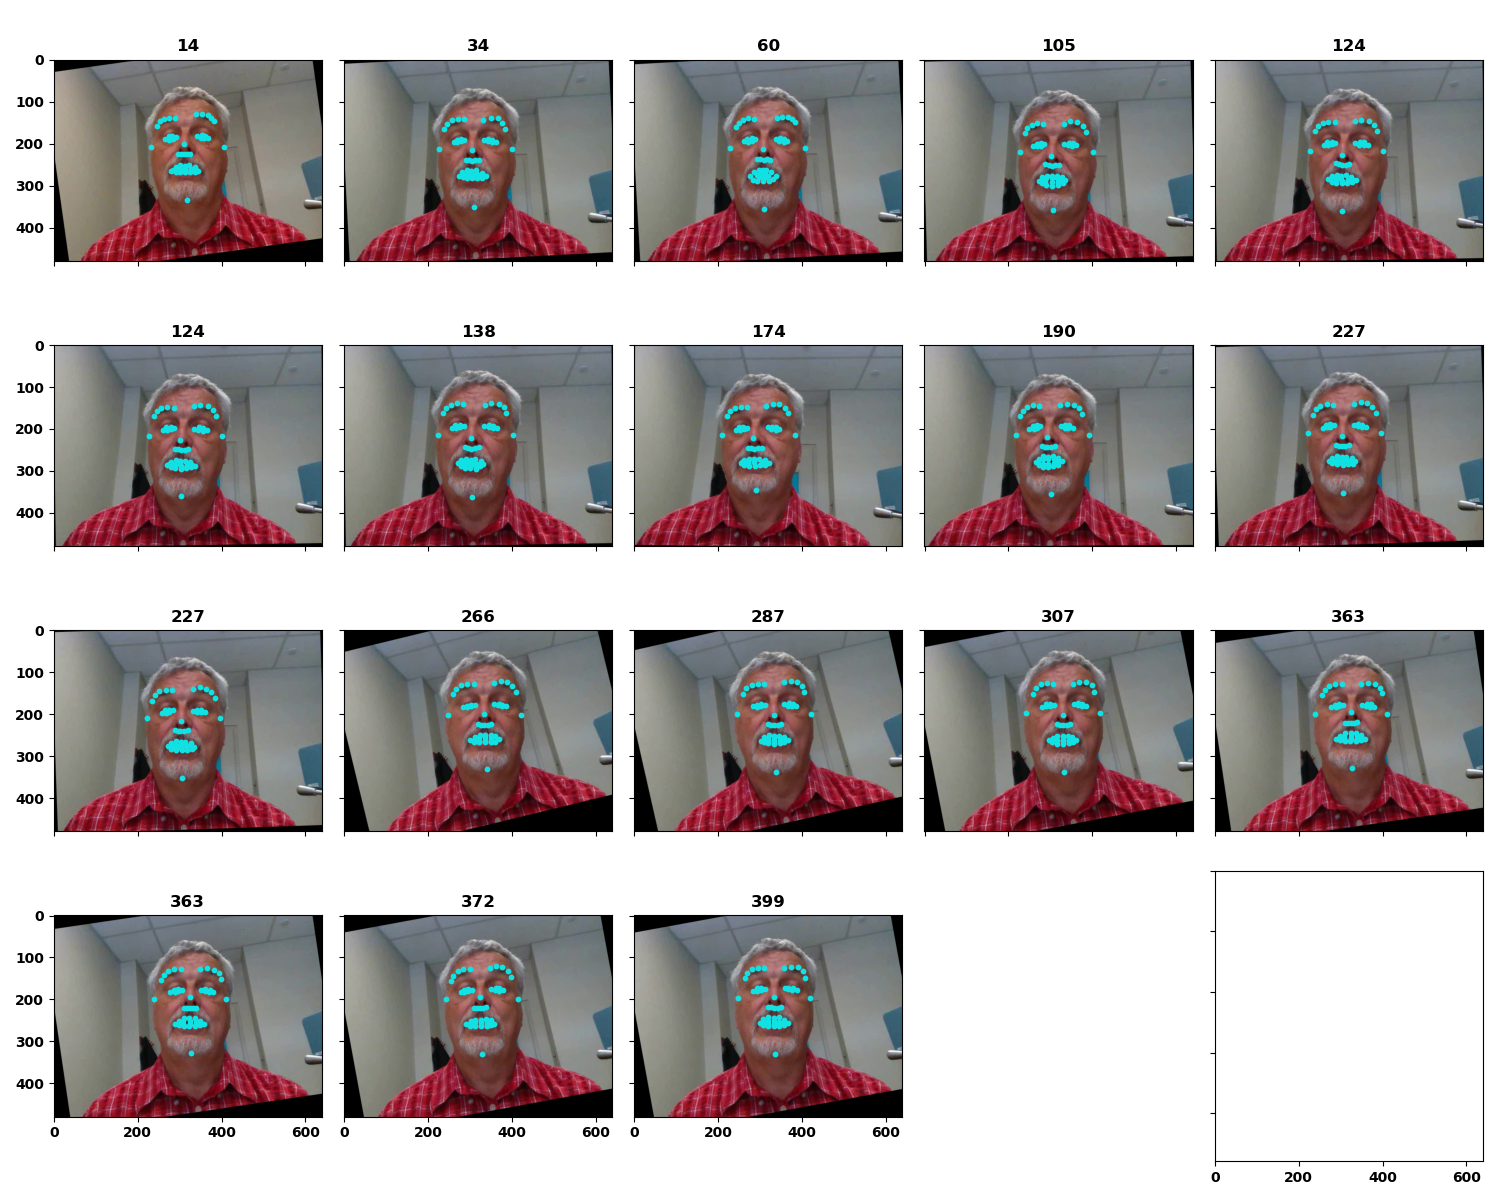

In [ ]:
num_frames = len(frame_list)
f, ax = plt.subplots(4,5, figsize=(15,12), sharex = True, sharey = True)

for i in range(len(ax)):
    for j in range(len(ax[i])):
        cur_ax = ax[i][j]
        idx = i*4+j
        if idx >= num_frames:
            cur_ax.axis('off')
            break
        fea = 'f'+str(idx)
        
        #cur_ax.hist(fixed_df[fea], bins=18)       
        #cur_ax.axvline(x=pat_fea[fea], color='r', linewidth=2)
        
        #percentile = percentileofscore(fixed_df[fea], pat_fea[fea])
        #lab = "Patient {}\nPercentile:{:.1f}".format(fea,percentile)
        #cur_ax.legend(fontsize=10, loc='upper right',labels=[lab])

        #cur_ax.set_xlabel(fea)
                
        cur_ax.set_title(frame_list[idx])
        cur_ax.imshow(np.flip(im_list[idx],axis=-1))
        cur_ax.scatter(lm_list[idx][:,0], lm_list[idx][:,1], c='#12e1e3', s=10)
        
plt.tight_layout()

# BACKUP
features_list = []

for this_dict in all_controls:
    pat_dict = this_dict[0]
    for t in pat_dict.keys():
        task_dict = pat_dict[t]
        for f in task_dict.keys():
            lms_gt = task_dict[f]['landmarks_gt']
            bbox = task_dict[f]['bbox']
            pr = ProcessResults(lms_gt, 'lms_only')
            #pr.scale_by_bbox(bbox)
            features_list.append(pr._features)
            
            gem_lm = to_gemma_landmarks(lms_gt)
            tilt_angle = angle(gem_lm, 48, 49)
            rot_center = tuple(np.int16(gem_lm[48]))
            rot_lm = rotate_landmarks(gem_lm,
                                           rot_center,
                                           -tilt_angle)
            rot_im = rotate_image(task_dict[f]['image'],
                                            rot_center,
                                            -tilt_angle)
                
            #vis_image(np.flip(rot_im, axis=-1))
            vis_landmarks(np.flip(rot_im, axis=-1), rot_lm, title=f)
    break

In [ ]:
mydf = pd.DataFrame(features_list) 
mydf['frame']=frame_list
cols = mydf.columns.tolist()
cols = cols[-1:] + cols[:-1]
mydf = mydf[cols]

fixed_df = mydf[np.isfinite(mydf).all(1)] 



In [ ]:
mydf

frame        f0        f1        f2        f3        f4        f5  \
0      14  4.175257  4.655471  9.091028  1.066030  0.073001  0.081433   
1      34  0.591429  2.440080 -0.691288  1.012876  0.010323  0.042613   
2      60  4.452492  3.774128  2.191985  1.045201  0.077867  0.065966   
3     105  0.451318  3.213133  1.636566  1.024191  0.007877  0.056139   
4     124  0.207511  2.018164  3.362474  1.016940  0.003622  0.035238   
5     138  0.588625  1.468147 -1.280177  1.009646  0.010274  0.025630   
6     174  2.456519  4.194554  3.155546  1.039348  0.042901  0.073340   
7     190  1.887970  2.908428  1.475049  1.031041  0.032963  0.050805   
8     227  2.359467  2.997962  3.098227  1.036182  0.041204  0.052372   
9     266  2.476753  3.658986  2.796396  1.045956  0.043254  0.063948   
10    287  1.696872  3.313147  5.650455  1.041103  0.029625  0.057890   
11    307  1.212372  3.087614  0.154468  1.030000  0.021163  0.053941   
12    363  1.491066  2.025691  1.090880  1.024073  0.026030  0.035370   
13    372  3.567462  5.055084  3.269308  1.060655  0.062345  0.088458   
14    399  0.417976  2.427340 -0.285160  1.017563  0.007295  0.042390   

          f6        f7        f8  ...       f19       f20       f21       f22  \
0   0.160013  1.279485  1.055445  ...  0.245690  0.234644  1.249840 -0.437637   
1   0.012066  0.692982  1.095588  ...  0.295351  0.280570  1.381787 -0.730458   
2   0.038276  0.481127  1.056630  ...  0.446747  0.439749  1.570349 -2.293953   
3   0.028571  1.074877  1.086093  ...  0.348142  0.365821  1.472139 -1.831634   
4   0.058754 -0.114674  1.116456  ...  0.271741  0.303312  1.369462 -0.813379   
5   0.022347  0.425059  1.041859  ...  0.365797  0.383852  1.440829 -0.770135   
6   0.055130  1.565416  1.116056  ...  0.242772  0.242425  1.331472 -0.658521   
7   0.025750  1.441686  1.040726  ...  0.387040  0.403356  1.541857 -1.460614   
8   0.054127  1.418686  1.128171  ...  0.303720  0.322043  1.374542  0.127351   
9   0.048845  1.776917  1.059595  ...  0.258953  0.276859  1.306790  0.912335   
10  0.098940  0.487139  1.020475  ...  0.279820  0.293573  1.340253  0.051113   
11  0.002696  1.532460  1.101799  ...  0.273492  0.285175  1.320045  0.040729   
12  0.019042  0.550596  1.013500  ...  0.280441  0.266016  1.348579  0.512597   
13  0.057122  2.502625  1.061562  ...  0.252632  0.243323  1.285971  0.611922   
14  0.004977  0.872176  1.022900  ...  0.315994  0.318668  1.366085  1.172156   

         f23       f24       f25       f26       f27       f28  
0   2.715433  1.052905  0.837563  0.832039  0.400640  0.174121  
1   1.251123  1.004821  0.888133  0.855179  0.401803  0.149667  
2   0.220838  1.005980  0.926677  0.904576  0.372672  0.143811  
3   2.455036  1.018363  0.931522  0.910479  0.337054  0.142799  
4   0.134031  1.019423  0.922930  0.898244  0.369308  0.148142  
5  -0.625574  1.033498  0.945106  0.918353  0.382340  0.151768  
6   2.809673  1.007808  0.906056  0.877014  0.328370  0.143669  
7   2.783297  1.018769  0.914663  0.894509  0.374661  0.132307  
8   1.974916  1.012984  0.905104  0.895448  0.385000  0.149337  
9   1.660580  1.012993  0.881982  0.869674  0.372488  0.139083  
10  0.156138  1.002881  0.883797  0.872521  0.379384  0.151295  
11 -0.807654  1.020200  0.884170  0.860508  0.379993  0.155148  
12 -1.642103  1.021703  0.854415  0.843464  0.373600  0.141601  
13  2.962923  1.028701  0.868457  0.856893  0.381913  0.163894  
14 -0.488512  1.017996  0.873500  0.851465  0.391206  0.141868  

[15 rows x 30 columns]

array([[<AxesSubplot:title={'center':'frame'}>,
        <AxesSubplot:title={'center':'f0'}>,
        <AxesSubplot:title={'center':'f1'}>,
        <AxesSubplot:title={'center':'f2'}>,
        <AxesSubplot:title={'center':'f3'}>],
       [<AxesSubplot:title={'center':'f4'}>,
        <AxesSubplot:title={'center':'f5'}>,
        <AxesSubplot:title={'center':'f6'}>,
        <AxesSubplot:title={'center':'f7'}>,
        <AxesSubplot:title={'center':'f8'}>],
       [<AxesSubplot:title={'center':'f9'}>,
        <AxesSubplot:title={'center':'f10'}>,
        <AxesSubplot:title={'center':'f11'}>,
        <AxesSubplot:title={'center':'f12'}>,
        <AxesSubplot:title={'center':'f13'}>],
       [<AxesSubplot:title={'center':'f14'}>,
        <AxesSubplot:title={'center':'f15'}>,
        <AxesSubplot:title={'center':'f16'}>,
        <AxesSubplot:title={'center':'f17'}>,
        <AxesSubplot:title={'center':'f18'}>],
       [<AxesSubplot:title={'center':'f19'}>,
        <AxesSubplot:title={'center':'

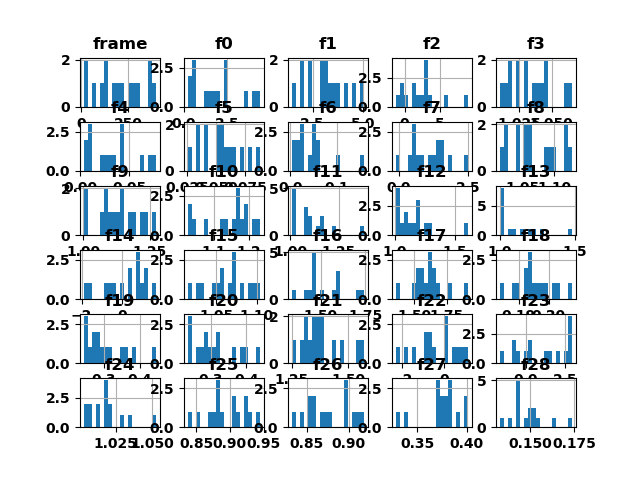

In [ ]:
fixed_df.hist(bins=18)
#fixed_df.plot.hist(subplots=True, layout=(6, 5), bins=18, sharex=False, sharey=False)

Column Name :  frame
Column Contents :  [ 14  34  60 105 124 138 174 190 227 266 287 307 363 372 399]
Column Name :  f0
Column Contents :  [4.17525667 0.59142946 4.45249205 0.45131787 0.20751097 0.58862481
 2.45651885 1.88797024 2.35946683 2.47675332 1.69687241 1.21237214
 1.49106551 3.56746204 0.41797595]
Column Name :  f1
Column Contents :  [4.65547067 2.44007999 3.77412784 3.21313256 2.0181641  1.46814712
 4.19455397 2.90842751 2.99796187 3.65898556 3.31314677 3.08761433
 2.02569055 5.05508387 2.42734018]
Column Name :  f2
Column Contents :  [ 9.09102784 -0.69128761  2.19198454  1.63656606  3.36247362 -1.28017687
  3.15554577  1.47504862  3.09822698  2.7963962   5.65045454  0.15446814
  1.09087985  3.26930812 -0.2851602 ]
Column Name :  f3
Column Contents :  [1.06603   1.012876  1.0452007 1.0241913 1.0169405 1.0096458 1.0393479
 1.0310409 1.0361818 1.0459564 1.0411029 1.0299997 1.0240728 1.0606552
 1.0175631]
Column Name :  f4
Column Contents :  [0.07300124 0.01032276 0.07786746 0.0

c:\Users\Nick\miniconda3\envs\bp\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Nick\miniconda3\envs\bp\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Nick\miniconda3\envs\bp\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

Column Name :  f10
Column Contents :  [1.1953821 1.170162  1.1287061 1.1923772 1.1874814 1.1552604 1.234003
 1.2112353 1.1724849 1.0331484 1.0252917 1.0729058 1.1299392 1.174944
 1.0480471]
Column Name :  f11
Column Contents :  [1.1698892 1.0104009 1.0121064 1.090693  1.0892684 1.0061482 1.0963287
 1.0792047 1.0815039 1.2173151 1.1537522 1.0206786 1.3823549 1.0077164
 1.1521869]
Column Name :  f12
Column Contents :  [1.2459025 1.0209074 1.0161412 1.1770374 1.1761898 1.0084742 1.1949533
 1.1708268 1.0116278 1.6095148 1.0433815 1.1165715 1.29697   1.0837922
 1.0844287]
Column Name :  f13
Column Contents :  [1.0921773 1.0000031 1.0080717 1.0047601 1.0028411 1.0033727 1.0023012
 1.0008218 1.1931014 1.        1.2902356 1.1551155 1.4822733 1.0733752
 1.2391006]
Column Name :  f14
Column Contents :  [ 0.86429266  0.27716637  0.46338685  0.72717689 -1.62602161 -1.89682134
 -0.65854744  1.25332169 -0.79529597  1.66055531  1.11618033 -0.48721234
  0.8264582   0.93202649  0.02966257]
Column Name 

c:\Users\Nick\miniconda3\envs\bp\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Nick\miniconda3\envs\bp\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Nick\miniconda3\envs\bp\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

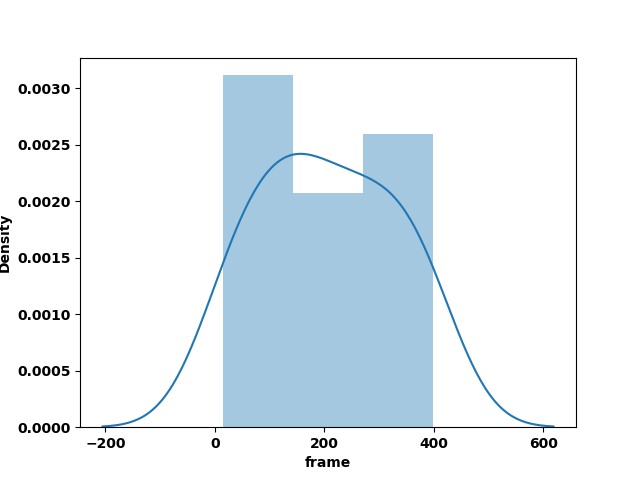

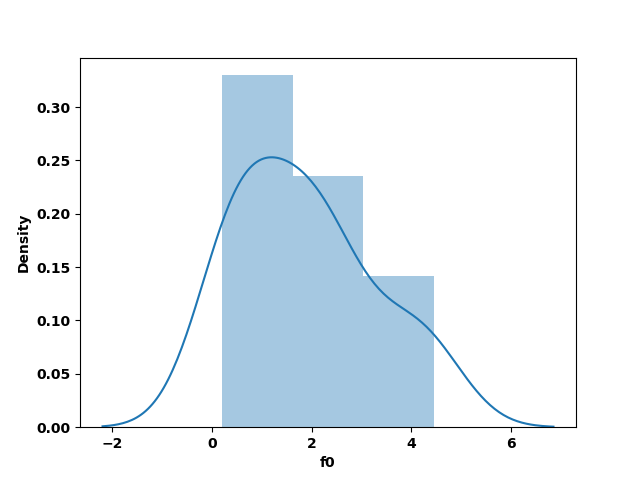

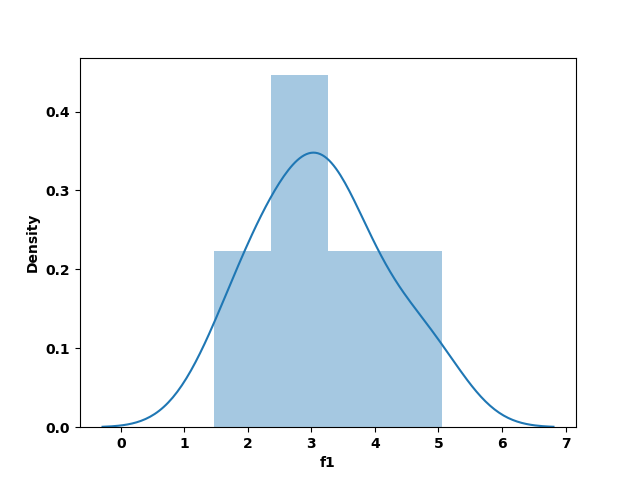

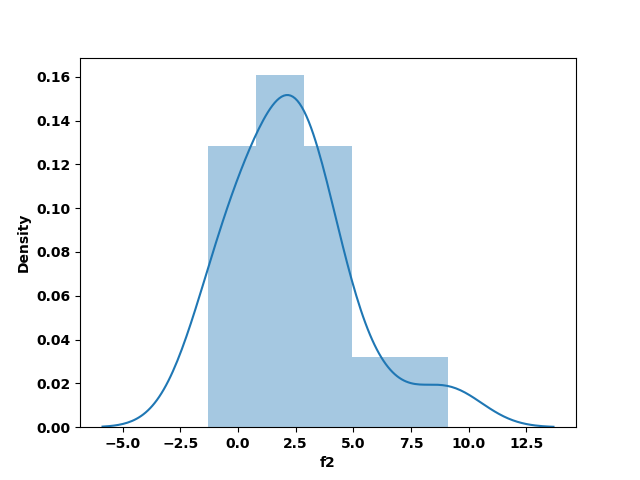

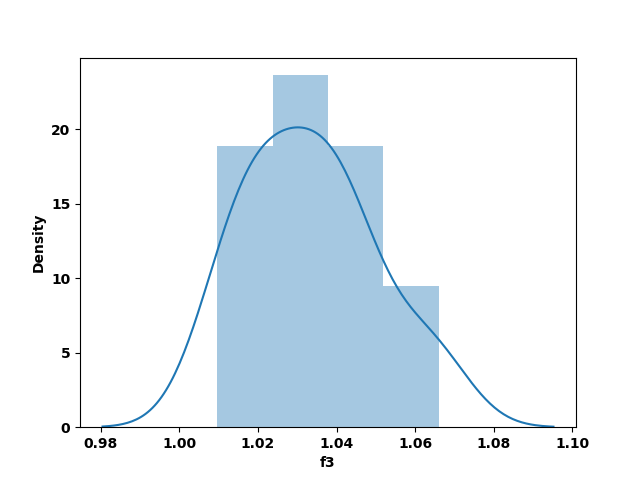

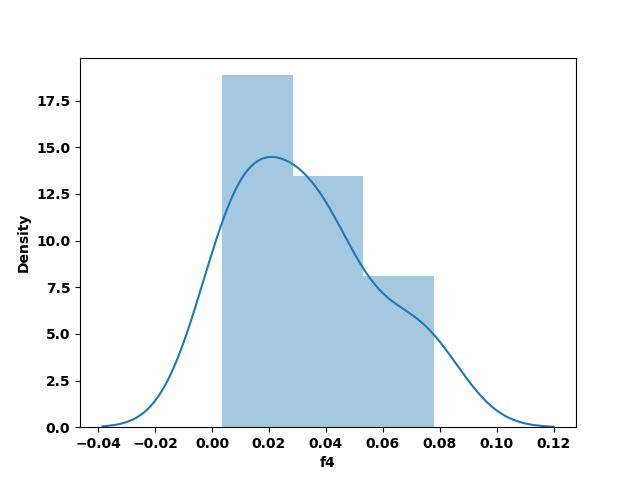

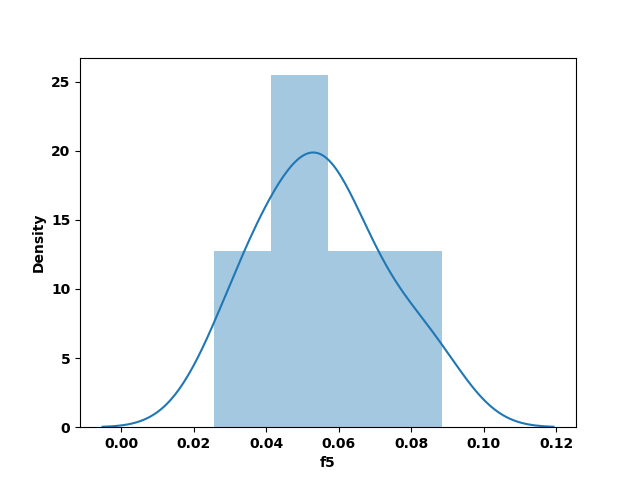

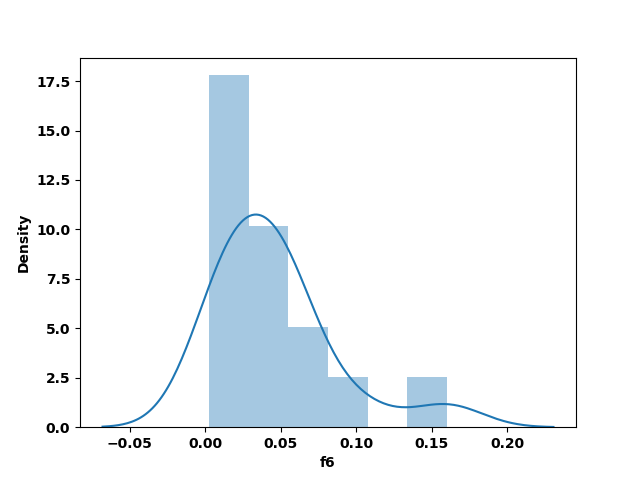

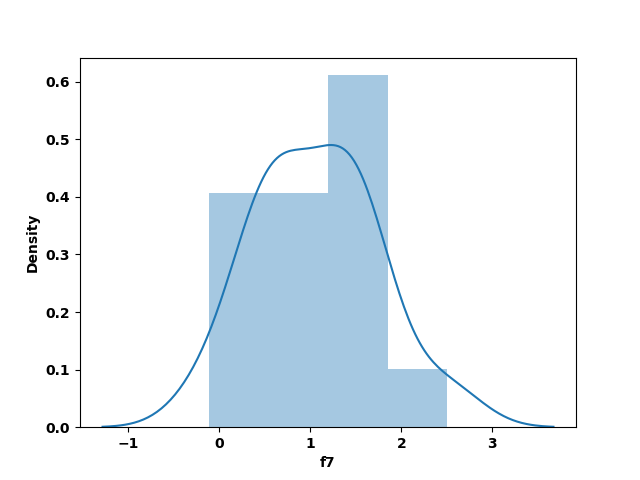

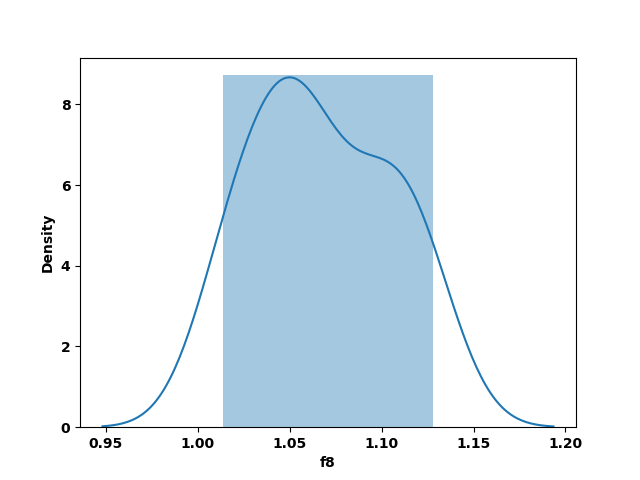

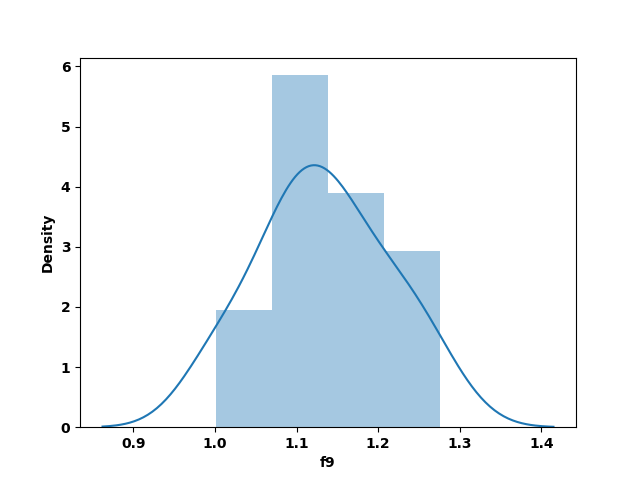

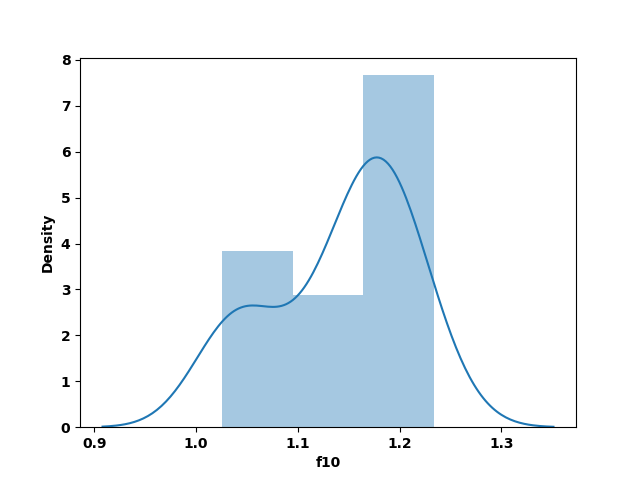

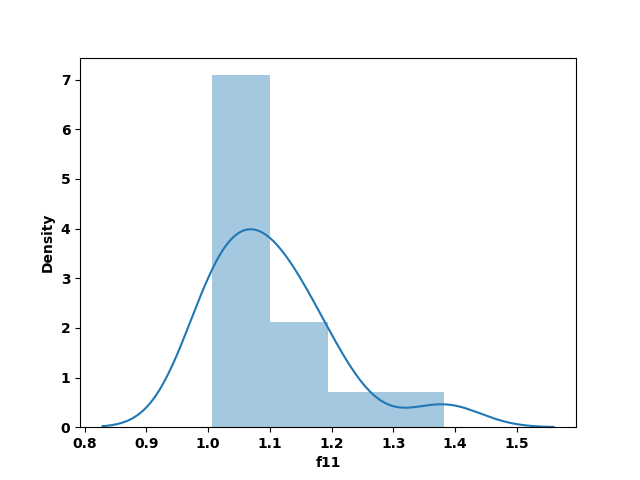

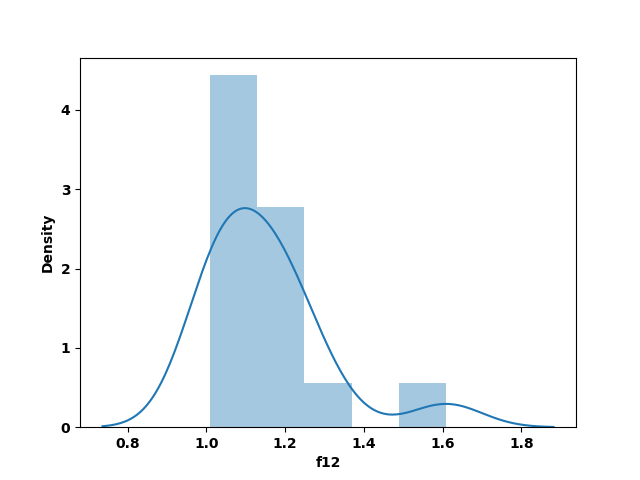

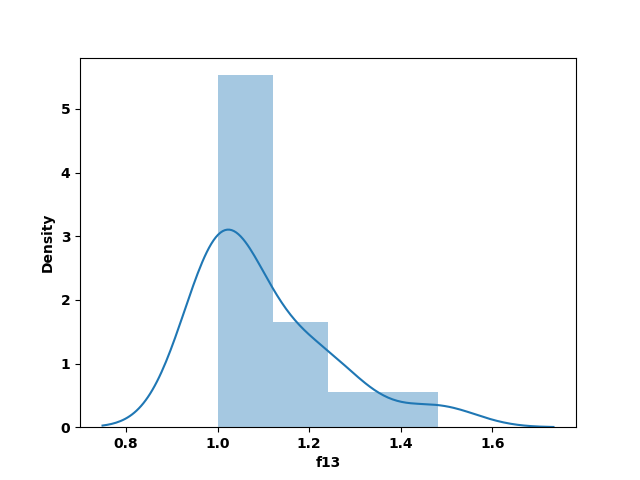

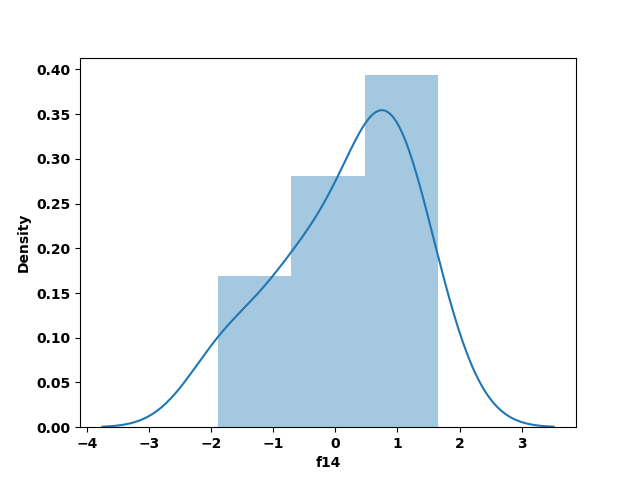

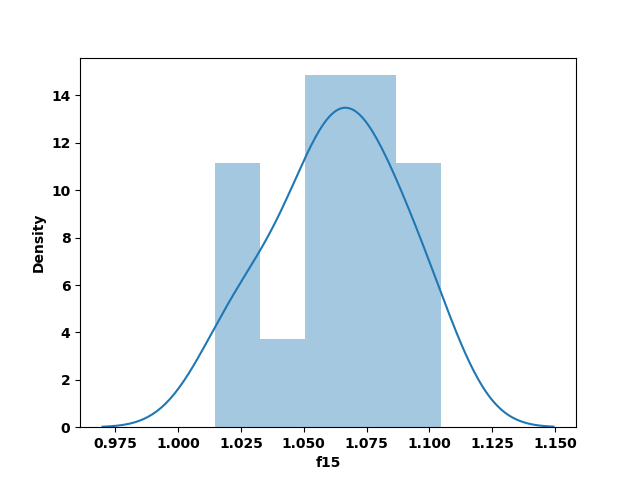

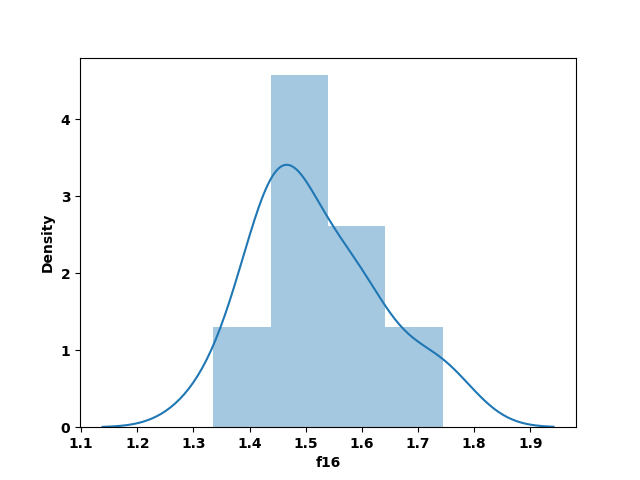

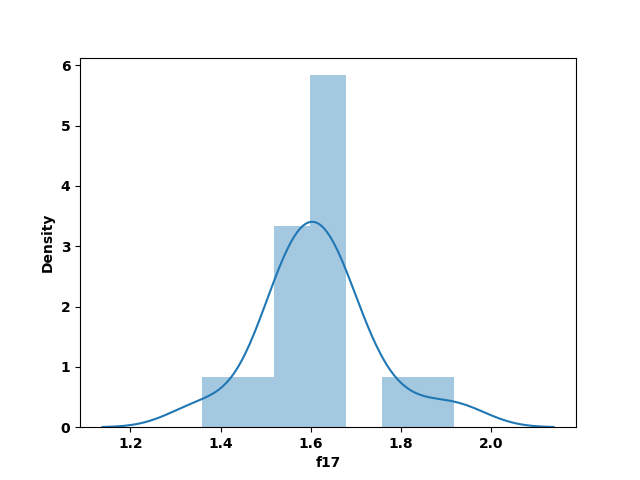

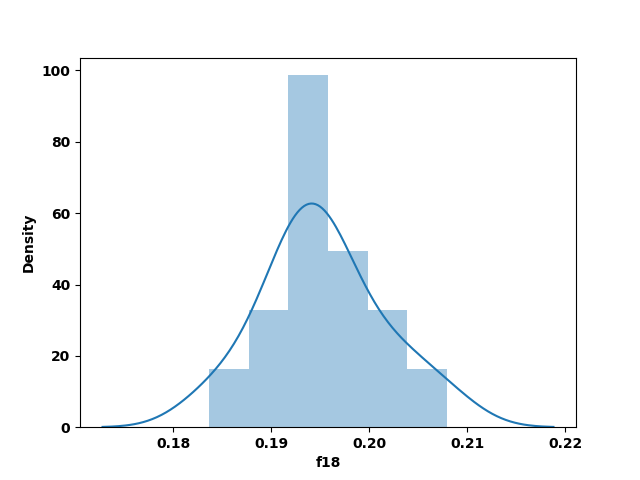

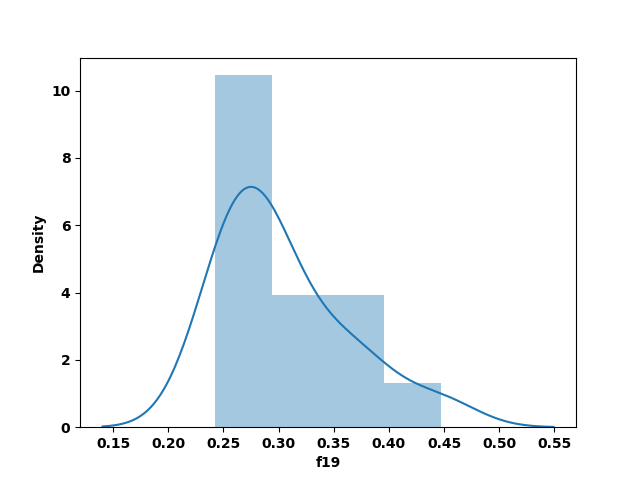

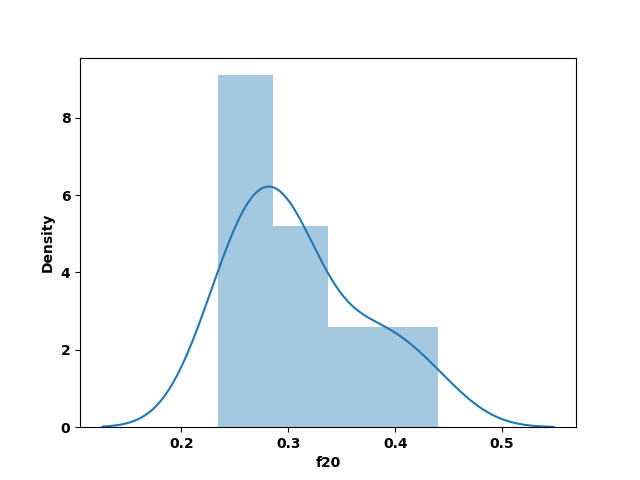

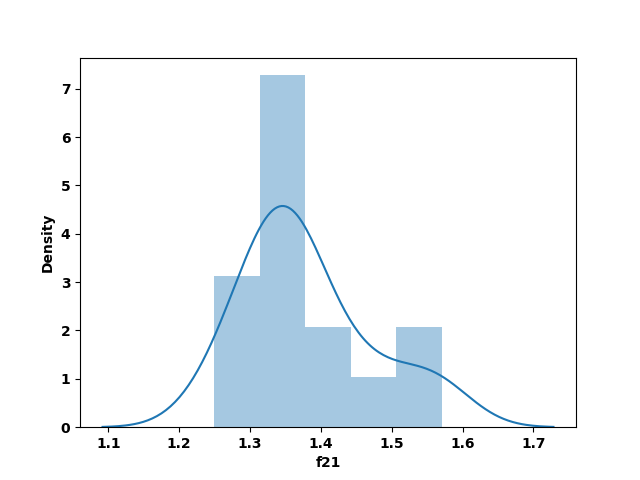

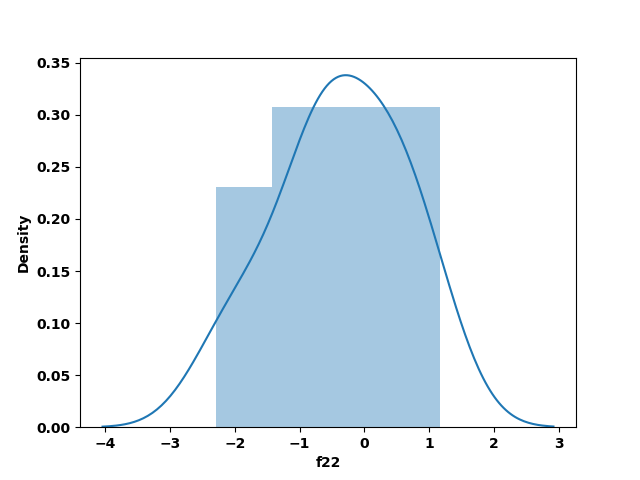

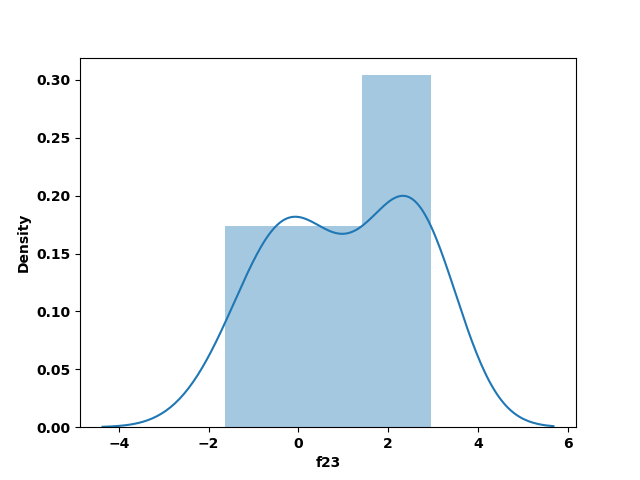

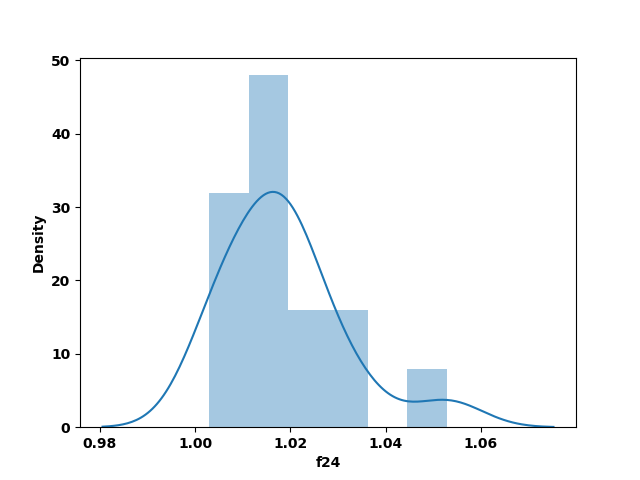

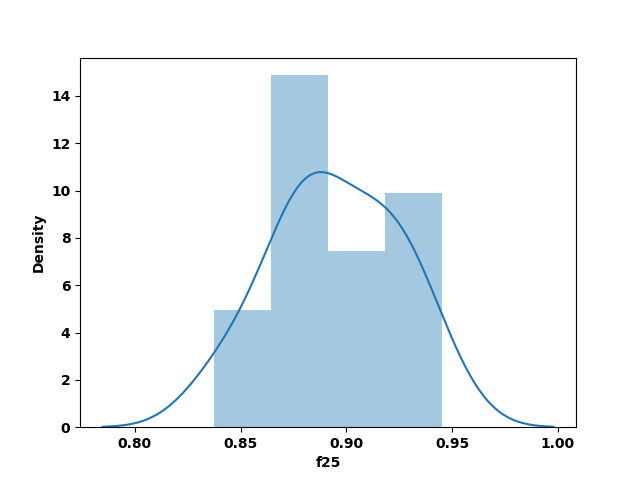

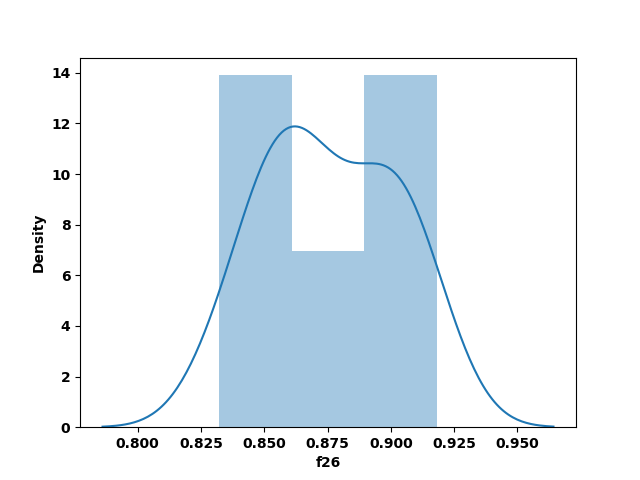

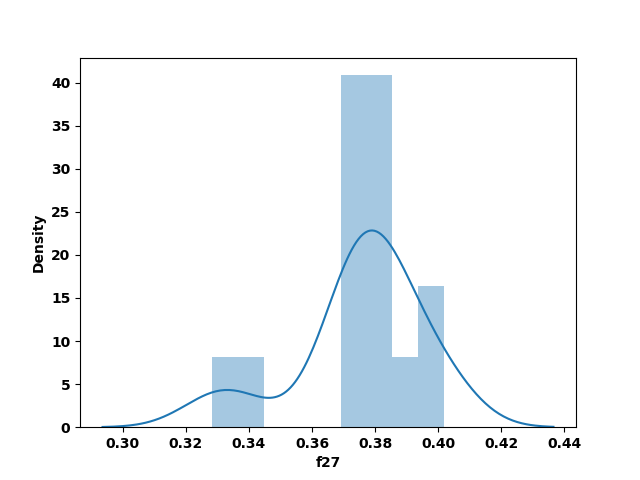

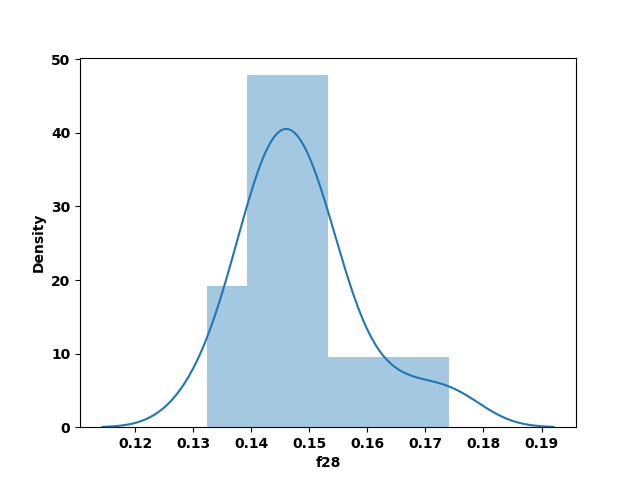

In [ ]:
for (columnName, columnData) in fixed_df.iteritems():
    print('Column Name : ', columnName)
    print('Column Contents : ', columnData.values)
    plt.figure(columnName)
    sns.distplot(columnData)
    

In [ ]:
len(fixed_df.index)

15

In [ ]:
#newdf = pd.DataFrame((fixed_df.mean(), fixed_df.median(), fixed_df.std()))
#newdf

In [ ]:
#newdf

In [ ]:
#f_list = list(features_list.keys())


#bins = np.arange(-10, 10, 1)
#hist, bins = np.histogram(fixed_df['f23'], bins=bins)
#width = np.diff(bins)
#center = (bins[:-1] + bins[1:]) / 2

fig, ax = plt.subplots(figsize=(8,3))

ax.set_title("Healthy Distribution vs. Patient Feature - f23")
#ax.bar(center, hist, align='center', width=width)
ax.hist(fixed_df['f23'], bins=18)
ax.axvline(x=-3.8523, color='r', linewidth=2)
#ax.axvline(x=-5.314, color='b', linewidth=2)
ax.legend(loc='upper right',labels=['Lower 5th Percentile', 'Patient f23'])

plt.xlabel("f23")
plt.ylabel("Observations")
ax.grid()
ax.set_xticks(bins)#

plt.show()


plt.figure()
plt.hist(fixed_df['f23'])
plt.title("Healthy Distribution vs. Patient Feature - f23")
patient_f23 = fixed_df['f23'][fixed_df['f23'] == -5.314]
plt.axvline(x=-3.8523, color='r', linewidth=2)
plt.legend(loc='upper right',labels=['Lower 5th Percentile', 'Patient f23'])
plt.xlabel("f23")
plt.ylabel("Frequency")
plt.grid()

plt.show()

In [ ]:
np.percentile(fixed_df['f23'], 5)

bins = np.arange(-10, 10, 1)
hist, bins = np.histogram(fixed_df['f23'], bins=bins)
width = np.diff(bins)
center = (bins[:-1] + bins[1:]) / 2

fig, ax = plt.subplots(figsize=(8,3))

ax.set_title("Healthy Distribution vs. Patient Feature - f23")
ax.bar(center, hist, align='center', width=width)
ax.axvline(x=-3.8523, color='r', linewidth=2)
ax.axvline(x=-5.314, color='b', linewidth=2)
ax.legend(loc='upper right',labels=['Lower 5th Percentile', 'Patient f23'])

plt.xlabel("f23")
plt.ylabel("Observations")
plt.grid()
ax.set_xticks(bins)#

plt.show()


bins = np.arange(1, 3, .1)
hist, bins = np.histogram(fixed_df['f21'], bins=bins)
width = np.diff(bins)
center = (bins[:-1] + bins[1:]) / 2

fig, ax = plt.subplots(figsize=(8,3))

ax.set_title("Healthy Distribution vs. Patient Feature - f21")
ax.bar(center, hist, align='center', width=width)
ax.axvline(x=1.7595, color='r', linewidth=2)
ax.axvline(x=1.916, color='b', linewidth=2)
ax.legend(loc='upper right',labels=['Upper 80th Percentile', 'Patient f23'])

plt.xlabel("f23")
plt.ylabel("Observations")

plt.xlabel("f21")
plt.ylabel("Observations")
plt.grid()
ax.set_xticks(bins)#

plt.show()